# Minitrabalho 2 – "Seis graus de separação"

##1) Representação dos dados


### 1.a) Descrição do modelo de grafo utilizado para concetualizar a relação ator-filme

Ao enfrentarmos o problema proposto, percebemos imediatamente que os atores estão conectados por filmes que fizeram em comum, por essa razão, decidimos que os atores no nosso grafo irão ser representados por vértices e os filmes por arestas.
Assim sendo, acabámos por obtar pela de estrutura de dados de Grafo, sendo este não orientado, sem multiarestas, cíclico e bastante esparso.

Como a nossa base de dados é bastante extensa tomámos a decisão de representar o nosso grafo com um mapa de adjâcencias. Este tipo de representação tem as vantagens de conseguir fazer rapidamente as operações necessárias para o grafo sem aumentar o custo espacial.

A maior modificação que fizemos nas Classes dadas em aula (semana 7) foi a adição de um método get_neighbors() na classe Graph que retorna todos os vizinhos de um certo vértice.



### Implementação da classe Vértice

In [ ]:
# Class Vertice
class Vertex:
    ''' Estrutura de Vértice para um grafo: encapsula um elemento (vertex_id)
        que é o identificador deste nó.

        O elemento (vertex_id) deve ser hashable:
        - Um objeto hashable é aquele que pode ser utilizado como uma chave num dicionário Python.
        - Isto inclui strings, números, tuplas, etc.
    '''

    def __init__(self, vertex_id):
        '''O vértice será inserido no Grafo usando o método insert_vertex(x) que cria um Vertex'''
        self._vertex_id = vertex_id   # Id do vértice (elemento a inserir no grafo)

    def __hash__(self):
        '''O valor do elemento é usado como hash para o vértice (o elemento deve ser hashable)'''
        return hash(self._vertex_id)  # devolve o hash do elemento

    def __str__(self):
        '''Devolve a representação do objeto vértice em string.'''
        return self._vertex_id

    def __eq__(self, vertex):
        return self._vertex_id == vertex._vertex_id # Deve-se garantir que: se hash(vertex)==hash(self), entao vertex==self

    def __lt__(self, vertex):
        return self._vertex_id < vertex._vertex_id

    def __le__(self, vertex):
        return self._vertex_id <= vertex._vertex_id

    def __gt__(self, vertex):
        return self._vertex_id > vertex._vertex_id

    def __ge__(self, vertex):
        return self._vertex_id >= vertex._vertex_id

    def vertex_id(self):
        ''' Devolve o elemento guardado neste vértice.'''
        return self._vertex_id

### Implementação da classe Edge

In [ ]:
class Edge:
    ''' Estrutura de Aresta para um Grafo: (origem, destino) e peso '''

    def __init__(self, vertex_1, vertex_2, edge_id):
        self._vertex_1 = vertex_1
        self._vertex_2 = vertex_2
        self.edge_id = edge_id  # New attribute for edge ID

    def __hash__(self):
        # Function mapping the edge to a position in the dictionary (hash map)
        return hash((self._vertex_1, self._vertex_2, self.edge_id))

    def __str__(self):
        return f"({self._vertex_1}, {self._vertex_2}), ID: {self.edge_id}"

    def __eq__(self, other):
        # Define equality of two edges (must be consistent with the hash function)
        return self._vertex_1 == other._vertex_1 and self._vertex_2 == other._vertex_2 and self.edge_id == other.edge_id

    def get_id(self):
      return self.edge_id

    def endpoints(self):
        ''' Returns the tuple (vertex_1, vertex_2) of the edge's endpoints.'''
        return (self._vertex_1, self._vertex_2)

    def opposite(self, vertex):
        ''' Indicates the opposite vertex to the given vertex on this edge
            (only if the vertex is part of the edge).'''
        if vertex == self._vertex_1:
            return self._vertex_2
        elif vertex == self._vertex_2:
            return self._vertex_1
        else:
            return None

### Implentação da classe Graph

In [ ]:
class Graph:
    '''
    Representação de um grafo usando dicionários encadeados (nested dictionaries).

    Atributos:
    ----------
    adjacencies: Dicionário externo que associa um vértice (Vertex) a um
                  mapa de adjacências (dicionario interno)
    vertices: Dicionário auxiliar que associa o id dos vértices do grafo
              a um objeto Vertex (tabela de símbolos).
    n: Número de vértices no Grafo
    m: Número de arestas no Grafo

    ----------
    '''

    def __init__(self):
        '''Construtor: Cria um grafo vazio (dicionário de _adjacencies).'''
        self._adjacencies = {}  # dicionário que associa o par chave-valor: <Vertex v, Mapa de adjacências de v>
        self._vertices = {}      # dicionário que associa o par: <id do vértice, objeto Vertex correspondente>
        self._n = 0              # número de vértices do grafo
        self._m = 0              # número de arestas do grafo

    def order(self):
        '''Ordem de um grafo: a quantidade de vértices no Grafo.'''
        return self._n

    def size(self):
        '''Dimensão de um grafo: a quantidade total de arestas do Grafo.'''
        return self._m

    def has_vertex(self, vertex_id):
        '''Verifica se o vértice de id vertex_id está no grafo.'''
        return vertex_id in self._vertices

    def has_edge(self, u_id, v_id):
        '''Verifica se a aresta (u_id, v_id) existe no grafo.'''
        if not self.has_vertex(u_id) or not self.has_vertex(v_id):
            return False
        else:
            vertex_u = self._vertices[u_id]
            vertex_v = self._vertices[v_id]
            return vertex_v in self._adjacencies[vertex_u]

    def get_vertex(self, vertex_id):
        ''' Devolve o objeto Vertex associado ao elemento vertex_id no grafo.'''
        return None if not self.has_vertex(vertex_id) else self._vertices[vertex_id]

    def get_edge(self, u_id, v_id):
        ''' Devolve o objeto aresta (Edge) que liga u_id a v_id.'''
        if not self.has_edge(u_id, v_id):
            return None
        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        return self._adjacencies[vertex_u][vertex_v]

    def insert_vertex(self, vertex_id):
        '''Insere um novo vértice com o id vertex_id.'''
        if not self.has_vertex(vertex_id):
            vertex = Vertex(vertex_id)
            self._vertices[vertex_id] = vertex  # insere o novo vértice no dicionario de vertices
            self._adjacencies[vertex] = {}     # inicializa o mapa de adjacências deste vértice a vazio
            self._n += 1                         # mais um vértice no grafo

    def insert_edge(self, u_id, v_id, edge_id):
        if not self.has_vertex(u_id):
            self.insert_vertex(u_id)  # insere novo vértice e atualiza n
        if not self.has_vertex(v_id):
            self.insert_vertex(v_id)  # insere novo vértice e atualiza n
        vertex_u = self._vertices[u_id]
        vertex_v = self._vertices[v_id]
        if vertex_u is None or vertex_v is None:
            raise ValueError("One or both of the vertices does not exist.")
        if not self.has_edge(u_id, v_id):
            self._m += 1  # atualiza m apenas se a aresta ainda não existir no grafo
            e = Edge(vertex_u, vertex_v, edge_id)
            self._adjacencies[vertex_u][vertex_v] = e  # coloca v nas adjacências de u
            self._adjacencies[vertex_v][vertex_u] = e  # e u nas adjacências de v

    def incident_edges(self, vertex_id):
        '''Devolve um iterável (gerador) com todas as arestas de um vértice com id vertex_id.'''
        vertex = self.get_vertex(vertex_id)
        for edge in self._adjacencies[vertex].values(): # para todas as arestas incidentes em v:
            yield edge

    def get_neighbors(self, vertex_id):
        '''Returns an iterable containing all neighbors of a vertex with the given ID.'''
        neighbors = set()  # Using a set to avoid duplicates
        for edge in self.incident_edges(vertex_id):
            opposite_vertex = edge.opposite(self.get_vertex(vertex_id))
            neighbors.add(opposite_vertex)
        return neighbors

    def get_neighbors2(self, movie_id):
      neighbors = set()  # Using a set to avoid duplicates
      for edge in self.incident_edges(movie_id):
        opposite_vertex = edge.opposite(movie_id)
        neighbors.add(opposite_vertex)
      return neighbors



    def degree(self, vertex_id):
        '''Quantidade de arestas incidentes no vértice v.'''
        if vertex_id not in self._vertices:
            return 0
        return len(self._adjacencies[self._vertices[vertex_id]])


    def vertices(self):
        '''Devolve um iterável sobre todos os vértices do Grafo (tipo Vertex)'''
        for vertex in self._vertices.values():
            yield vertex

    def edges(self):
        '''Devolve um iterável sobre todas as arestas do Grafo (tipo Edge)'''
        visited = set()  # To avoid duplicating edges
        for adj_map in self._adjacencies.values():
            for edge in adj_map.values():
                if edge not in visited:
                    yield edge
                    visited.add(edge)

**1.b) Implementação de uma função auxiliar para a construção de um grafo**

(implementado na classe HollywoodOracle)


## 2) API HollywoodOracle

**2.a) Estrutura de para a implementação da API**


A nossa classe HollywoodOracle possui 2 estruturas de dados principais:


*   A estrutura self.graph que é toda a informação de atores e filmes em forma de grafo representado na classe Graph em formato de mapa de adjacência. Por isso esta estrutura tem um complexidade espacial de **S(n):O(n+m)** sendo n o nº de vértices e m o nº de arestas.
*   A estrutura self.bfs_dict é um dicionário em que a chaves são os vértices conectados ao centro do universo. Ou seja irá ter um complexidade espacial de **S(n):O(n)**



**2.b) Implementação das operações listadas na API**

In [ ]:
import queue
class HollywoodOracle:
    def __init__(self, filename):
        self.filename = filename
        self.graph = Graph()
        self.load_data()
        self.set_center_of_universe("Bacon, Kevin")

    def load_data(self):
        with open(self.filename, 'r') as file:
            for line in file:
                data = line.strip().split('/')
                movie = data[0].strip()
                for actor_data in data[1:]:
                    self.graph.insert_vertex(actor_data)

                for i in range(1,len(data)):
                    for j in range(i + 1, len(data)):
                        self.graph.insert_edge(data[i], data[j], movie)

    def all_movies(self):
      return self.graph.edges()

    def all_actors(self):
      return self.graph.vertices()

    def movies_from(self, actor):
      if not self.graph.has_vertex(actor):
        return []

      movies_set = set()  # Using a set to store unique movie IDs
      for edge in self.graph.incident_edges(actor):
        movie_id = edge.get_id()
        movies_set.add(movie_id)
      return movies_set

    def cast_of(self, movie):
      cast_set = set()  # Using a set to store unique actors
      if self.graph.has_vertex(movie):
        neighbors = self.graph.get_neighbors2(movie)
        for neighbor in neighbors:
            cast_set.add(neighbor.vertex_id())
      return cast_set

    def set_center_of_universe(self,x):
      if(not self.graph.has_vertex(x)):
        print("ator não existe")
        return None
      aux={x:(None,0)}
      q = queue.Queue()
      q.put(x)
      while (not q.empty()):
        head=q.get()
        for i in self.graph.get_neighbors(head):
          h=i.vertex_id()
          if h not in aux:
            q.put(h)
            aux[h]=(head,aux[head][1]+1)
      self.bfs_dict=aux

    def number_of_X(self,a):
      if a in self.bfs_dict:
        return self.bfs_dict[a][1]
      else:
        -1

    def path_to_X(self,a):
        if a not in self.bfs_dict:
          return "No Conexion"
        else:
          sol= a
          while(self.bfs_dict[a][1]!=0):
            sol= sol + " was in " + self.graph.get_edge(a,self.bfs_dict[a][0]).get_id() + " with " + self.bfs_dict[a][0]
            a=self.bfs_dict[a][0]
          return sol

    def max_number_of_X(self):
      max_key = max(self.bfs_dict, key=lambda k: self.bfs_dict[k][1])
      return (self.bfs_dict[max_key][1],self.graph.order()-len(self.bfs_dict))

    def count_number_of_X(self,n):
      count = sum(1 for value in self.bfs_dict.values() if value[1] == n)
      return count

    def average_number_of_X(self):
      total_sum = sum(value[1] for value in self.bfs_dict.values())
      num_values = len(self.bfs_dict)
      return total_sum / num_values

In [ ]:
oracle=HollywoodOracle("small_dataset_utf8.txt")

Devolve um iterável com todos os filmes na base de
dados.

O tempo que esta função demora depende do número de filmes: O(m)

O espaço de memória que esta função ocupa não depende do tamanho do grafo: O(1)

In [ ]:
print(oracle.all_movies())

Devolve um iterável com todos os atores na base de
dados.

O tempo que esta função demora depende do número de atores: O(n)

O espaço de memória que esta função ocupa não depende do tamanho do grafo: O(1)

In [ ]:
print(oracle.all_actors())

Devolve um iterável que lista os filmes em que o ator
dado (a) já atuou.

O tempo que esta função demora depende do número de filmes: O(n)

O espaço de memória que esta função ocupa é proporcional ao número de filmes: O(m)

In [ ]:
print(oracle.movies_from("Davis, Warwick (I)"))

Devolve um iterável com os atores que atuaram num
dado filme (movie).

O tempo que esta função demora depende do número de atores: O(n)

O espaço de memória que esta função ocupa é proporcional ao número de atores: O(n)

In [ ]:
print(oracle.cast_of("Haik"))

set()


Configura o ator dado (x) como novo “centro do
universo” e calcula novamente o “número de X” para
cada ator existente na base de dados.

Foi implementa uma busca em largura (BFS) no grafo para calcular o caminho mais curto a partir de um ator central (o centro do universo) para todos os outros atores no grafo

São visitados todos os vértices acessíveis a partir do vértice inicial, sendo cada um deles visitado no máximo uma vez durante a travessia.
No pior caso, a BFS visitará todos os n vértices e m arestas uma vez.
Portanto, a ordem de complexidade da função set_center_of_universe(x) é, supondo que o grafo tenha n vértices  e m arestas,
O(n + m).

O espaço de memória que esta função ocupa é proporcional ao número de atores: O(n)

In [ ]:
print(oracle.set_center_of_universe("Bacon, Kevin"))

Devolve o “numero de X” do ator dado (a), considerando
o “centro do universo” atual, X.

Este método verifica diretamente o valor no dicionário bfs_dict para o ator dado. Portanto, a complexidade de tempo é O(1).

A memória que esta função ocupa não depende do tamanho do grafo O(1)

In [ ]:
print(oracle.number_of_X("Youngman, Henny"))

Devolve a sequência de filmes e atores que conduzem ao
ator “centro do universo”, X

A memória que esta função ocupa não depende do tamanho do grafo O(1)

In [ ]:
print(oracle.path_to_X("Emmanuelle/Marina"))
print(oracle.path_to_X("Youngman, Henny"))

Devolve:
• O "número de X" máximo para os atores existentes
na base de dados, excluindo todos os atores que não
estão relacionados com o “centro do universo” atual
(e cujo “número de X” é infinito).
• O número de atores que não estão relacionados com
o “centro do universo” atual

O tempo que esta função demora depende do número de atores: O(n)

A memória que esta função ocupa não depende do tamanho do grafo O(1)

In [ ]:
print(oracle.max_number_of_X())

Devolve o número de atores/atrizes com “numero de X”
igual ao valor inteiro dado (n).

O tempo que esta função demora depende do número de atores: O(n)

A memória que esta função ocupa não depende do tamanho do grafo O(1)

In [ ]:
n=4
print(oracle.count_number_of_X(n))

Devolve o valor médio do “número de X” para os atores
existentes na base de dados, excluindo todos os atores
que não estão relacionados com o “centro do universo”
atual (e cujo “número de X” é infinito).

O tempo que esta função demora depende do número de atores: O(n)

A memória que esta função ocupa depende do número de atores no grafo O(n)

In [ ]:
print(oracle.average_number_of_X())

## 3) Testes

**3.1)**


In [ ]:
import matplotlib.pyplot as plt
histograma = {}

# Contando as ocorrências de cada valor e armazenando no dicionário
for valor in oracle.bfs_dict:
    if oracle.bfs_dict[valor][1] in histograma:
        histograma[oracle.bfs_dict[valor][1]] += 1
    else:
        histograma[oracle.bfs_dict[valor][1]] = 1
valores = list(histograma.keys())
contagens = list(histograma.values())

# Criando o gráfico de barras
plt.bar(valores, contagens, color='green')

# Adicionando rótulos e título
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.title('Contagem dos Valores')

plt.show()

print(histograma)
print(oracle.average_number_of_X())

**3.2)**

Depp, Johnny
Damon, Matt
Clooney, George
Jolie, Angelina
Blanchett, Cate
Bale, Christian
Pitt, Brad
DiCaprio, Leonardo
Ledger, Heath
Portman, Natalie
Diaz, Cameron
Aniston, Jennifer
Neeson, Liam
Crowe, Russell
Banderas, Antonio (I)
Bullock, Sandra
Roberts, Julia (I)
Thurman, Uma
Smith, Will (I)
Hanks, Tom


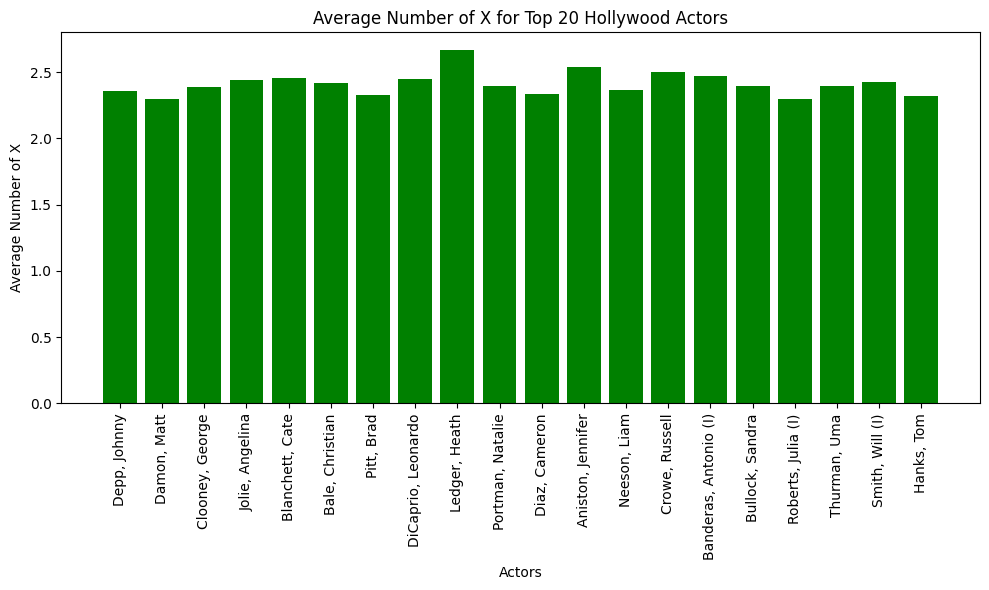

In [ ]:
import csv

actor_names = []
average_number_of_X_values = []

#top 20 actors from the CSV file
with open("top20imbd.csv", 'r') as file:
    csv_reader = csv.reader(file, delimiter=";")

    for row in csv_reader:
        actor = row[1]
        oracle.set_center_of_universe(actor)
        # Calculate the average number of X
        avg_number_of_X = oracle.average_number_of_X()
        # Append the actor name and average number of X to the lists
        actor_names.append(actor)
        average_number_of_X_values.append(avg_number_of_X)
        print(actor, " tem um average number de ", avg_number_of_X)

plt.figure(figsize=(10, 6))
plt.bar(actor_names, average_number_of_X_values, color='green')
plt.xlabel('Actors')
plt.ylabel('Average Number of X')
plt.title('Average Number of X for Top 20 Hollywood Actors')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()



**3.3)**

In [ ]:
oracle = HollywoodOracle("small_dataset_utf8.txt")

Data loaded successfully.


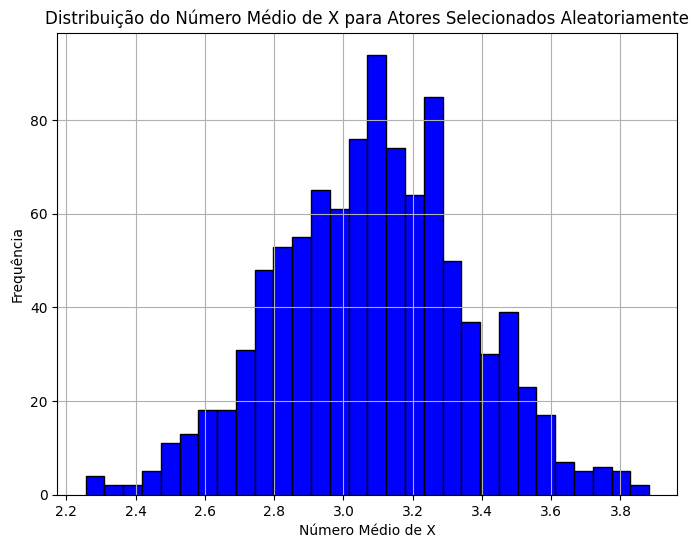

In [132]:
import os
import random
import matplotlib.pyplot as plt

def test_six_degrees_of_separation(num_random_actors, output_file):

    average_X_values = []
    if os.path.exists(output_file) and os.path.getsize(output_file) > 0:
        # Load previously saved results
        with open(output_file, 'r') as file:
            average_X_values = [float(line.strip()) for line in file]

        print("Data loaded successfully.")
    else:
        print("No valid data found, generating new random actors.")


    # Randomly select actors
    selected_actors = random.sample(list(oracle.all_actors()), num_random_actors)

    # Calculate the average number of X for each selected actor
    for actor in selected_actors:

        oracle.set_center_of_universe(actor.vertex_id())
        avg_X = oracle.average_number_of_X()
        average_X_values.append(avg_X)
        print(actor, avg_X)

    # Write results to a file
    with open(output_file, 'w') as file:
        for avg_X in average_X_values:
            file.write(str(avg_X) + '\n')

    # Plotting the graph
    plt.figure(figsize=(8, 6))
    plt.hist(average_X_values, bins=30, color='blue', edgecolor='black')
    plt.xlabel('Número Médio de X')
    plt.ylabel('Frequência')
    plt.title('Distribuição do Número Médio de X para Atores Selecionados Aleatoriamente')
    plt.grid(True)
    plt.show()

#foram testados 1000 valores que agora estão guardados em file.txt
test_six_degrees_of_separation(0, "file.txt")